# Outils de visualisation des projets recrutements 2020

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [4]:
df = pd.read_excel('ResMetBE20.xlsx', sheet_name=[0, 1])[1].sort_values(by='nommetier')

In [5]:
# Carte métier

def creerSeriesMetier(metier):
    data_par_metier = df[df['nommetier']==metier]
    new_dict = {}
    for d in data_par_metier['Dept'].unique():
        s = sum([int(k) for k in data_par_metier[data_par_metier['Dept']==d]['met'] if k!='*'])
        new_dict[d]=s
    return pd.Series(data=new_dict)

def creerCarteMetier(metier):
    
    projets_recrutements_par_metier = creerSeriesMetier(metier)

    GEOJSON = "departements.geojson"

    
    m = folium.Map(location=[46.15, 2.7], tiles="cartodbpositron", zoom_control=False,
               scrollWheelZoom=True,
               dragging=True)
    m.fit_bounds([[42.789808, -3.05741], [49.821154, 9.07744]])
    fc = folium.Choropleth(
        geo_data=GEOJSON,
        name='choropleth',
        data=projets_recrutements_par_metier,
        key_on='feature.properties.code',
        fill_color='YlGn',
        fill_opacity=1.0,
        line_opacity=0.1,
        nan_fill_color = 'red',
        nan_fill_opacity=1.0,
        legend_name='Projets de recrutement '+ metier.replace(r"'", r"\'"),
        
    ).add_to(m)
    fc.geojson.add_child(
        folium.features.GeoJsonTooltip(aliases=['Département :'],fields=['nom']))
    
    display(m)

In [6]:
# Top 30 département

def creerSeriesDept(dept):
    df_dept = df[df['NomDept']==dept]
    new_dict = {}
    for m in df_dept['nommetier'].unique():
        s = sum([int(k) for k in df_dept[df_dept['nommetier']==m]['met'] if k!='*'])
        new_dict[m]=s
    return pd.Series(data=new_dict).sort_values(ascending=False)

def afficherBarPlotTotal(dept):
    series=creerSeriesDept(dept)
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    plt.figure(figsize=(15, 50))
    g = sns.barplot(x=series, y=series.index)
    g.set_xticks(range(0, series[0], int(series[0]/20)))
    g.set_xticklabels(labels = range(0, series[0], int(series[0]/20)), rotation=30)
    return g
    
def afficherBarPlotTop30(dept):
    series=creerSeriesDept(dept)
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    plt.figure(figsize=(15, 20))
    g = sns.barplot(x=series[:30], y=series[:30].index)
    g.set_xticks(range(0, series[0], int(series[0]/20)))
    g.set_xticklabels(labels = range(0, series[0], int(series[0]/20)), rotation=30)
    g.tick_params(labelsize=22)
    plt.show()

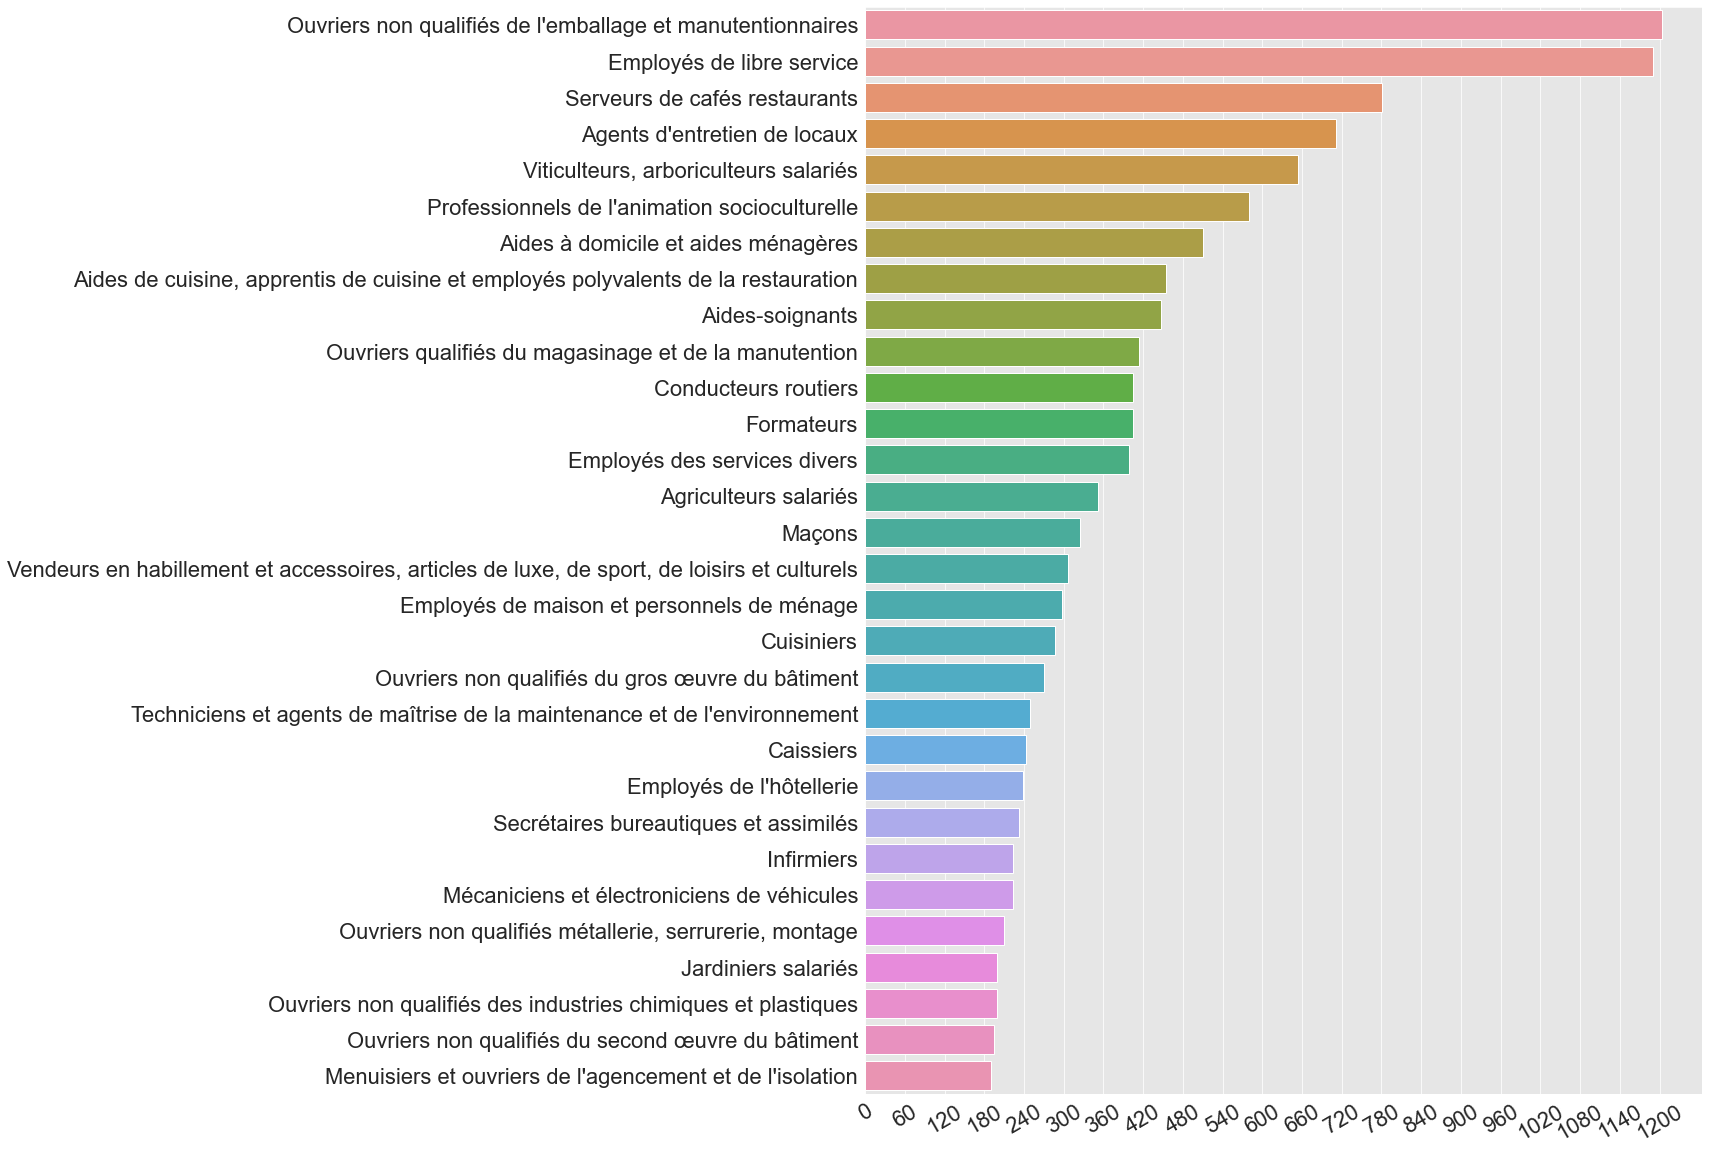

In [36]:
liste_metiers = sorted(list(df['nommetier'].unique()))
departements = list(df['NomDept'].unique())
liste_departements = [i for i in departements if type(i) is not float]
liste_departements = sorted(liste_departements)


names = ['Top 30 département', 'Carte métier']
tab = widgets.Tab(layout=widgets.Layout(width='90%', height='70%'))
[tab.set_title(i, title) for i, title in enumerate(names)]



departement = widgets.Dropdown(
        options=liste_departements,
        value=liste_departements[0],
        description = " ",
        layout=widgets.Layout(width='50%', height='30px', margin='20px')
    )


metier = widgets.Dropdown(
        options=liste_metiers,
        value=liste_metiers[0],
        description=" ",
        layout=widgets.Layout(width='50%', height='30px', margin='20px')
    )


metiers_top30 = interactive(afficherBarPlotTop30, dept=departement)
label_metiers_top30 = widgets.Label("Visualisez les 30 métiers les plus recherchés dans le département choisi.")
box_metiers_top30 = widgets.HBox([widgets.Label(value="Choisissez un département :", layout=widgets.Layout(width='200px', margin='20px')), metiers_top30])

carte_metier = interactive(creerCarteMetier, metier=metier)
label_carte_metier = widgets.Label("Visualisez sur la carte les projets de recrutement pour le métier choisi.")
box_carte_metier = widgets.HBox([widgets.Label(value="Choisissez un métier :", layout=widgets.Layout(width='200px', margin='20px')), carte_metier])

label_saut_ligne = widgets.Label("   ")

tab.children = [widgets.VBox([label_metiers_top30, box_metiers_top30]), widgets.VBox([label_carte_metier, box_carte_metier])]

display(tab)